<a href="https://colab.research.google.com/github/argONNY/Data-processing-and-visualization-tools/blob/main/laba7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving credit+approval.zip to credit+approval (2).zip


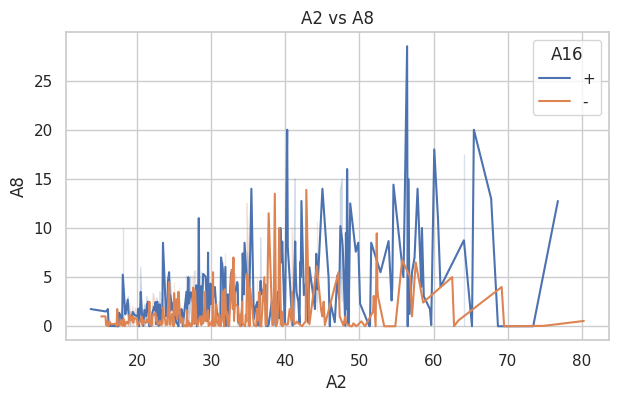

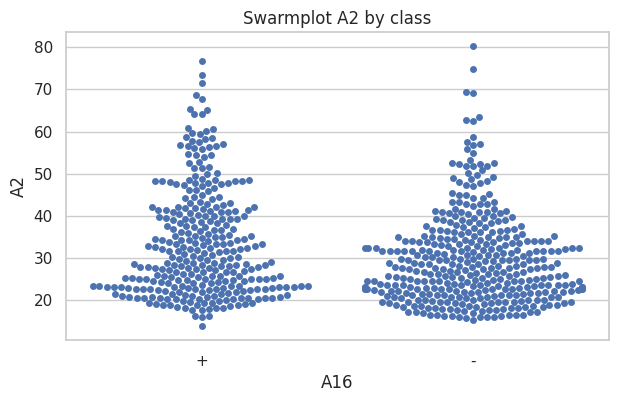

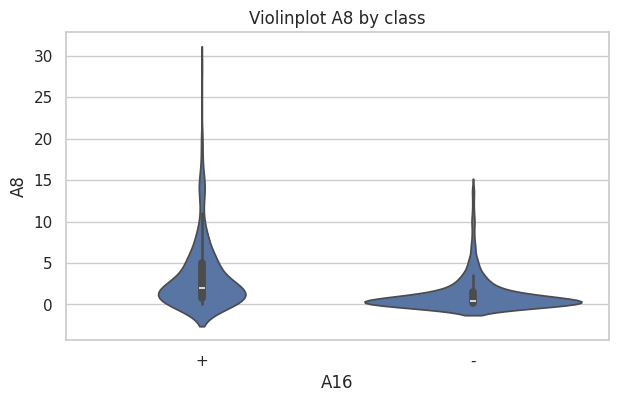

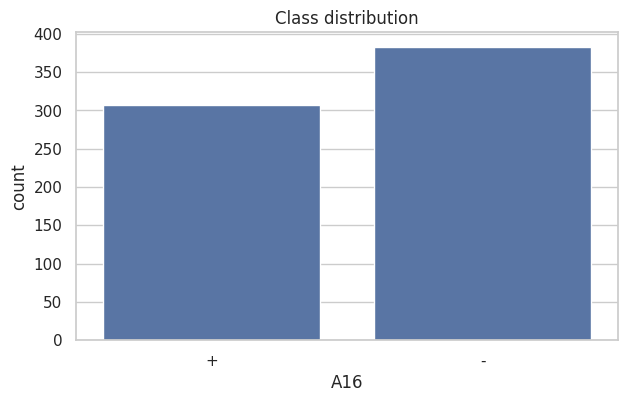

In [5]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# загрузка архива через Colab
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, "r") as z:
    z.extractall()

# загрузка данных
columns = [
    "A1","A2","A3","A4","A5","A6","A7",
    "A8","A9","A10","A11","A12","A13","A14",
    "A15","A16"
]

df = pd.read_csv("crx.data", header=None, names=columns)
df = df.replace("?", np.nan)  # заменяем "?" на NaN

# обработка числовых признаков
numeric = ["A2", "A8", "A14"]
for col in numeric:
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(df[col].mean())

# обработка категориальных признаков
df = df.fillna(df.mode().iloc[0])

sns.set(style="whitegrid")

# Lineplot
plt.figure(figsize=(7,4))
sns.lineplot(data=df, x="A2", y="A8", hue="A16")
plt.title("A2 vs A8")
plt.show()

# Swarmplot
plt.figure(figsize=(7,4))
sns.swarmplot(data=df, x="A16", y="A2")
plt.title("Swarmplot A2 by class")
plt.show()

# Violinplot
plt.figure(figsize=(7,4))
sns.violinplot(data=df, x="A16", y="A8")
plt.title("Violinplot A8 by class")
plt.show()

# Countplot
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="A16")
plt.title("Class distribution")
plt.show()
